In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Import the Fashion MNIST dataset

Using 70_000 images mnist can look through the items and find simularities and pair like items together in the same catagory. It uses 60_000 to train the program and 10_000 to test accuracy.


In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

The images contain pixel values of 0 to 255, and labels ranging from 0 to 9. These connect the class of item the image represents:

Values will be stored this way to plot with later.

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

There are 60_000 labels

In [11]:
len(train_labels)

60000

Each label again is a number between 0 and 9:

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10_000 images to test.

In [13]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [14]:
len(test_labels)

10000

## Preprocess the data

You have to make sure that all the images going through testing are all the same width and height for the process to work correctly.

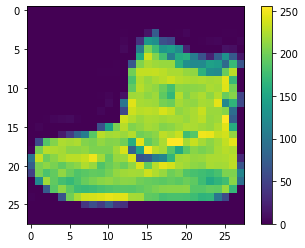

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Its important that training and testing sets get handled the same way.

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Run a training set with 25 of the different images and make sure that once it runs that the program does not classify any of them together.

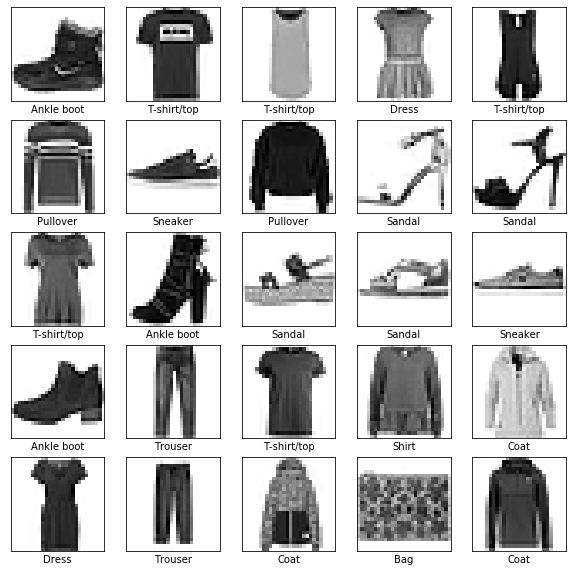

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Most of deep learning consists of chaining together simple layers, which have parameters that are learned in the training proccess.

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

FIrst thing that happens is the images get reformatted into a two dementional array. Two more layers of nodes pass there way through the array of images and gives them a classification and assigns them a value o 1-9.

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4983 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3783 - accuracy: 0.8624
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3400 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3139 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2956 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2812 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2694 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2575 - accuracy: 0.9038
Epoch 9/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2507 - accuracy: 0.9068
Epoch 10/10
60

Here the loss and accuracy data is displayed.

## Evaluate accuracy

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2385 - accuracy: 0.8827

Test accuracy: 0.8827


## Make predictions


In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([4.7425548e-09, 4.3053627e-10, 1.0268453e-09, 2.6656542e-06,
       1.7392800e-08, 5.5199014e-03, 2.0052047e-08, 8.3598029e-03,
       1.9410521e-07, 9.8611730e-01], dtype=float32)

A prediction is an array of 10 numbers. The higher the number the higher the confidence value:

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

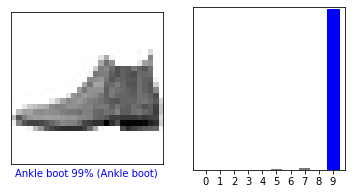

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

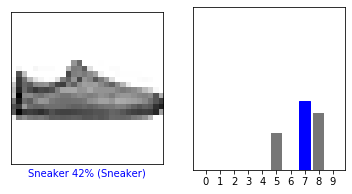

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

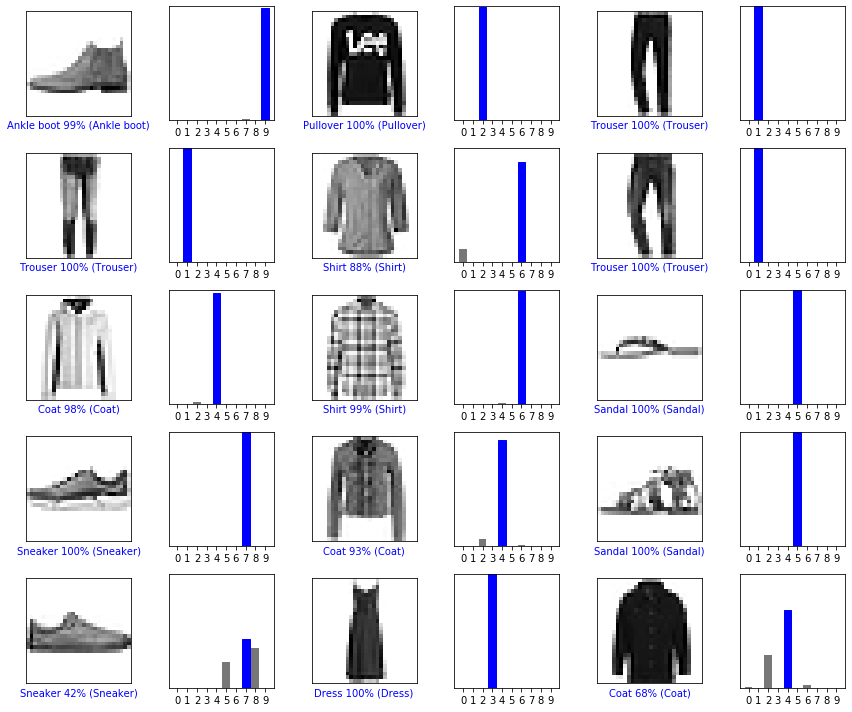

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [29]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.6211359e-05 4.1800296e-12 9.9895132e-01 6.0213520e-13 8.2566054e-04
  2.5394065e-15 1.3681730e-04 2.5619945e-19 1.3836390e-10 7.8930840e-14]]


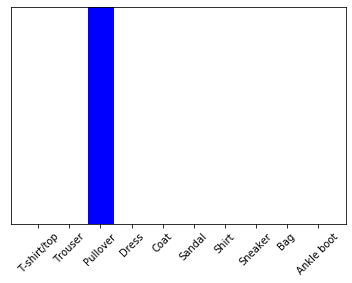

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [32]:
np.argmax(predictions_single[0])

2